In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

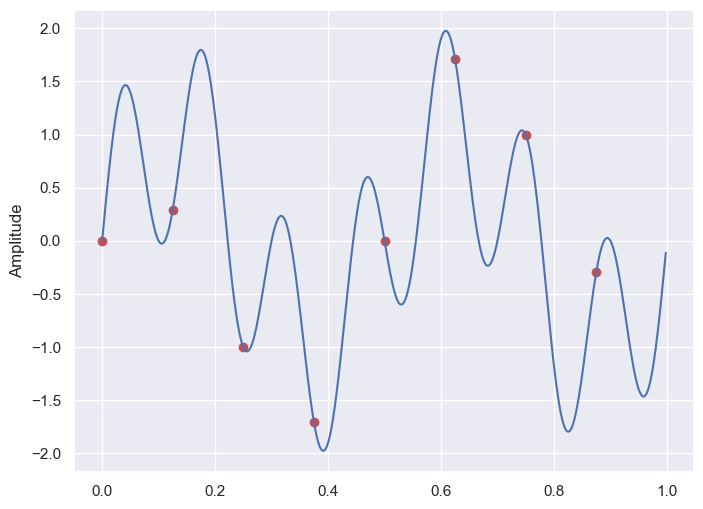

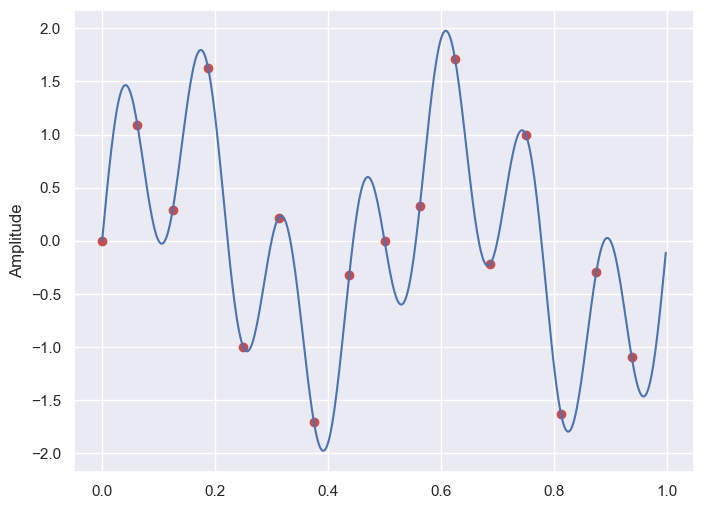

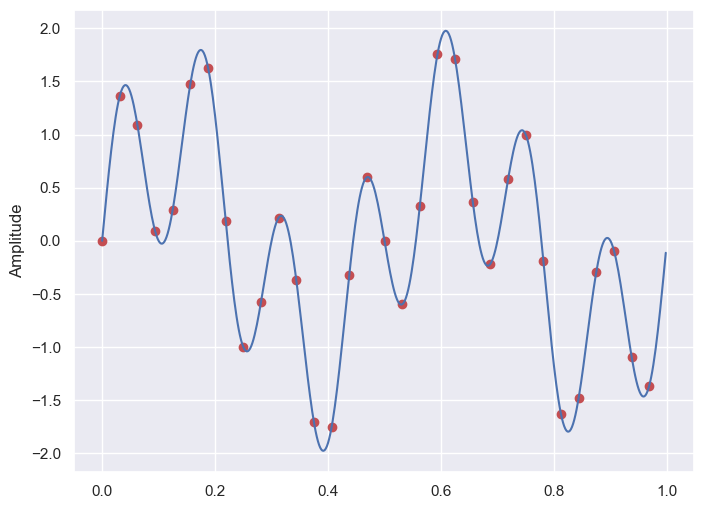

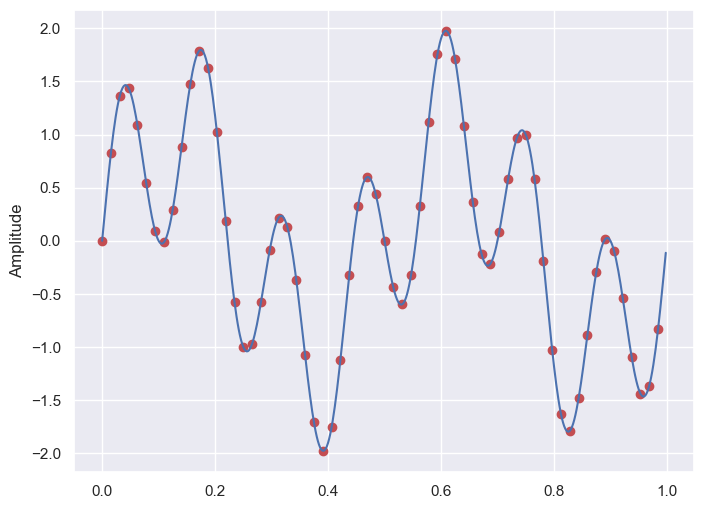

In [70]:



def sins(sr):
    # sampling rate
    sr = sr
    # sampling interval
    ts = 1.0/sr
    t = np.arange(0,1,ts)
    freq = 2
    x = np.sin(2*np.pi*freq*t)

    freq = 7
    x += np.sin(2*np.pi*freq*t)
    return x,t
xs_list = []
for i in range(3,7):
    x,t = sins(2**i)
    xs_list.append(x)
    x2,t2 = sins(500)

    plt.figure(figsize = (8, 6))
    plt.scatter(t, x,c='r', marker='o')
    plt.plot(t2, x2)
    plt.ylabel('Amplitude')

    plt.show()

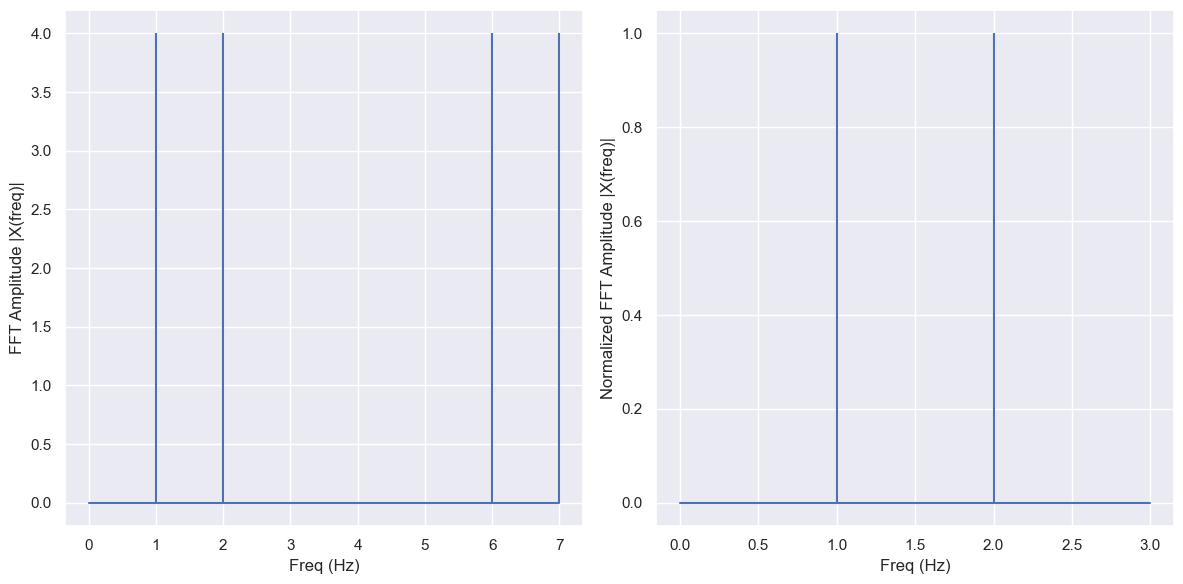

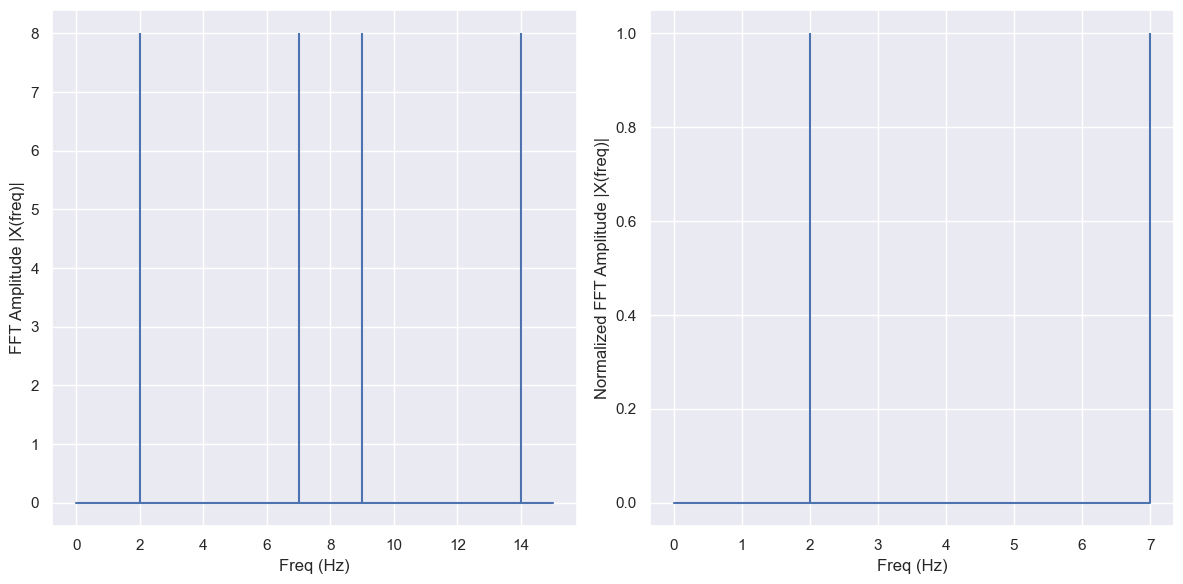

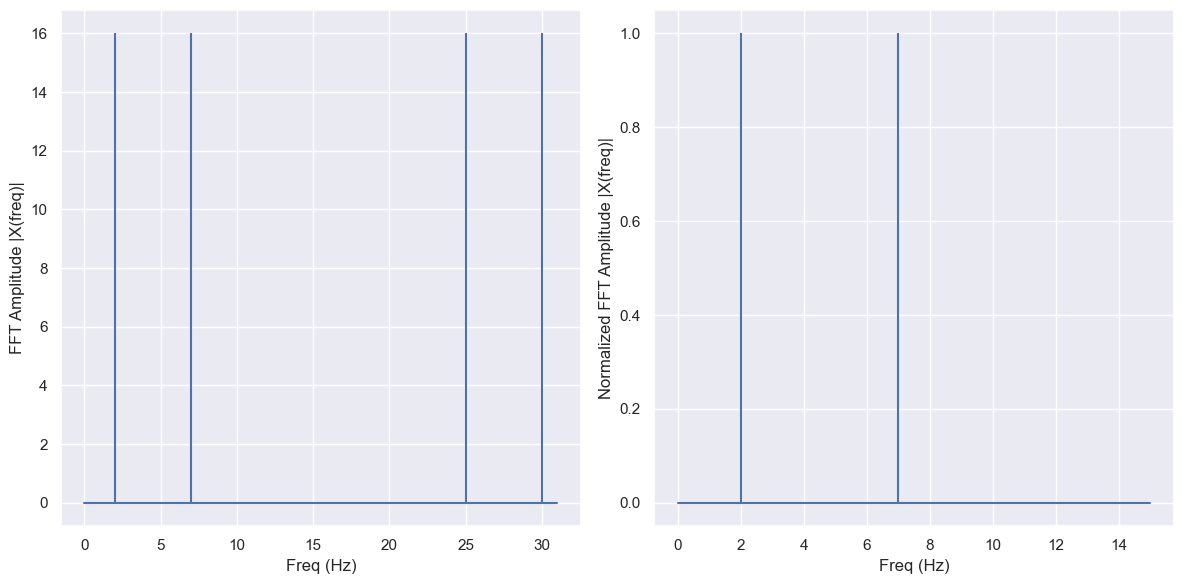

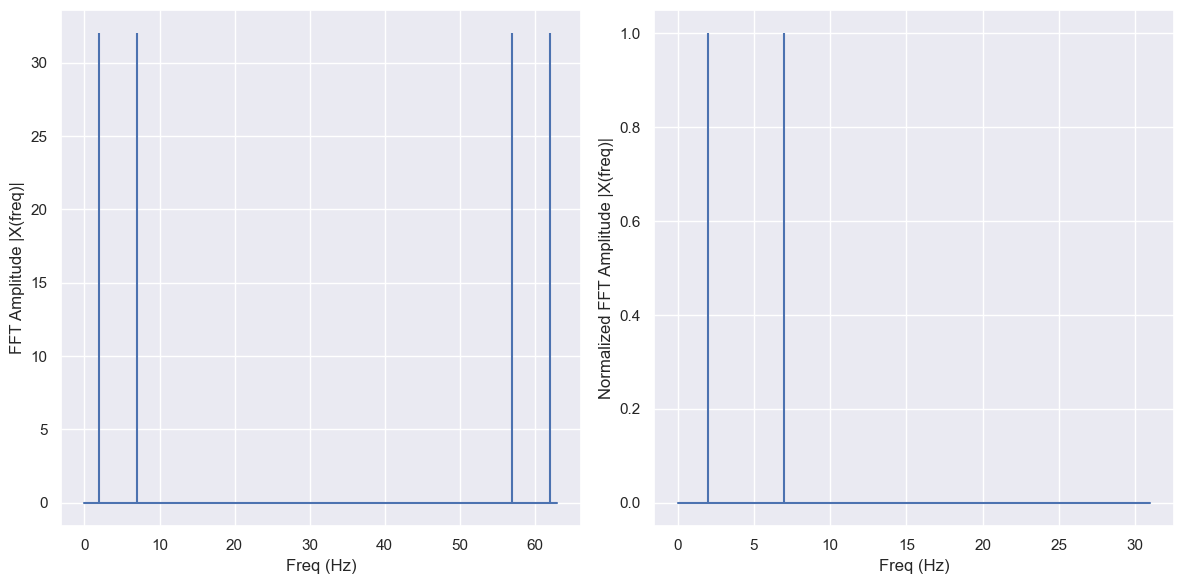

In [74]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X
for i,j in enumerate(range(3,7)):
    X=FFT(xs_list[i])

    # calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N/( 2**j) # sr
    freq = n/T 

    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    plt.stem(freq, abs(X), 'b', \
            markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside

    plt.subplot(122)
    plt.stem(f_oneside, abs(X_oneside), 'b', \
            markerfmt=" ", basefmt="-b")
    #plt.plot
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Normalized FFT Amplitude |X(freq)|')
    plt.tight_layout()
    plt.show()

c:\Users\ahmed\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


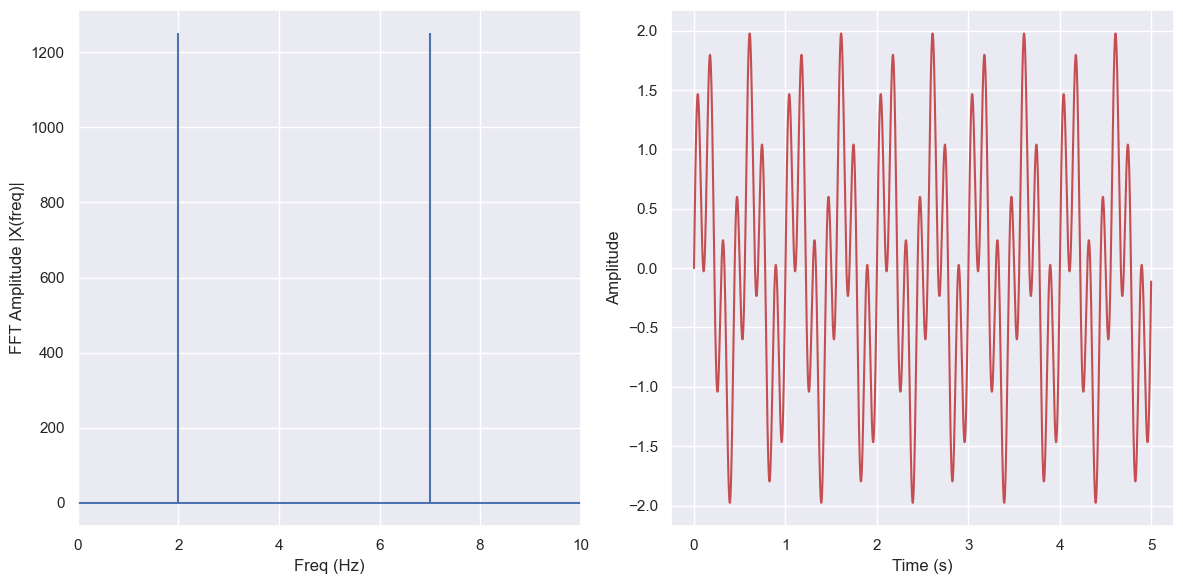

In [44]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

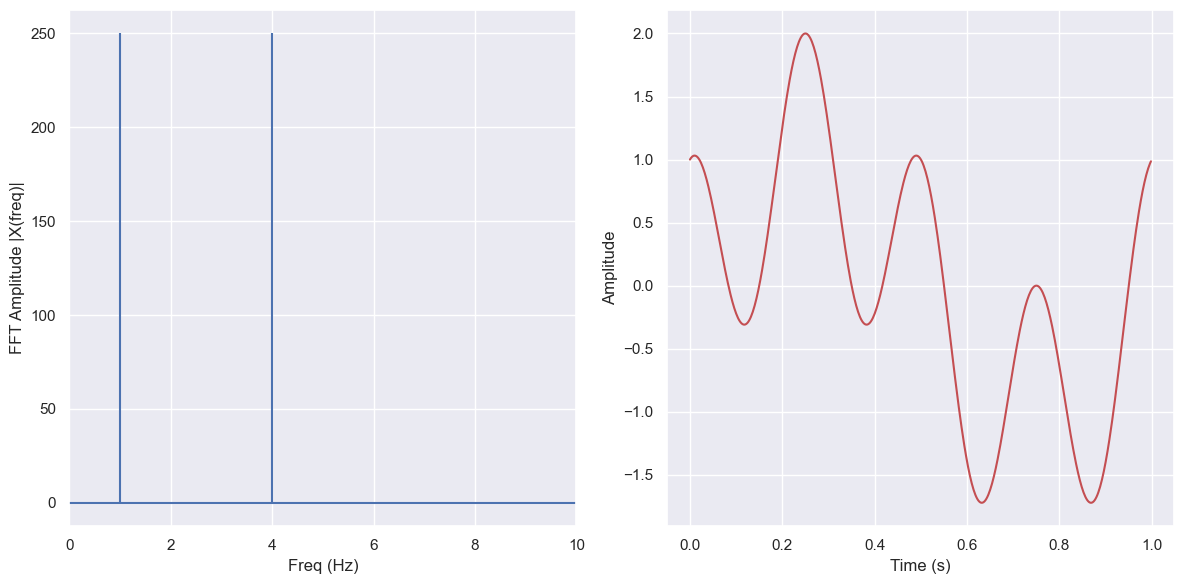

In [40]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()